#### Name: Eric Lindgren
#### CID: ericlin
#### PSN: 970222-1954

## Neural Network classification

In [2]:
# Imports
import numpy as np
import matplotlib.pyplot as plt

Load dataset

inputs: (n_data, pixel_width, pixel_height) = (1797, 8, 8)
                       with labels (n_data) = (1797,)

flattened input, X: (n_inputs, n_features)  = (1797, 64)


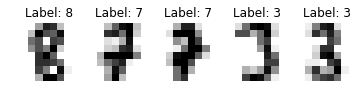

In [12]:
# import 
from sklearn import datasets

# ensure the same random numbers appear every time
np.random.seed(0)

# download MNIST dataset
digits = datasets.load_digits()

# define inputs and labels
inputs = digits.images
labels = digits.target

print(f"inputs: (n_data, pixel_width, pixel_height) = {inputs.shape}")
print(f"                       with labels (n_data) = {labels.shape}")


# flatten the image
# the value -1 means dimension is inferred from the remaining dimensions: 8x8 = 64
n_inputs = len(inputs)
inputs = inputs.reshape(n_inputs, -1)
print(f"\nflattened input, X: (n_inputs, n_features)  = {inputs.shape}")


# choose some random images to display
indices = np.arange(n_inputs)
random_indices = np.random.choice(indices, size=5)

for i, image in enumerate(digits.images[random_indices]):
    plt.subplot(1, 5, i+1)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title(f"Label: {digits.target[random_indices[i]]:1}")

Prepare dataset

In [13]:
from sklearn.model_selection import train_test_split

# ensure the same random numbers appear every time
np.random.seed(0)

train_size = 0.7
test_size = 1 - train_size
X_train, X_test, Y_train, Y_test = train_test_split(inputs, labels, train_size=train_size,
                                                    test_size=test_size)

print(f"Number of training images: {len(X_train):4}")
print(f"Number of test images:     {len(X_test):4}")

Number of training images: 1257
Number of test images:      540


Initialize the network

In [14]:
# initializing our neural network

n_inputs, n_features = X_train.shape
n_hidden_neurons = 50
n_categories = 10

# we make the weights normally distributed using numpy.random.randn

# ensure the same random numbers appear every time
np.random.seed(0)

# weights and bias in the hidden layer
hidden_weights = np.random.randn(n_features, n_hidden_neurons)
hidden_bias = np.zeros(n_hidden_neurons) + 0.01

# weights and bias in the output layer
output_weights = np.random.randn(n_hidden_neurons, n_categories)
output_bias = np.zeros(n_categories) + 0.01

### Task 1: Implement the feed-forward pass

Implement the forward pass as described in the problem description. The activation for layer h is:
$$ z_j = \sum_i^F w_{ji}x_i + b_j = W$$
$$ \vec{z} = W^T\vec{x} + \vec{b}$$

Note the transpose on W, which is required the way it is designed (n_features, n_hidden_neurons).

In [80]:
def sigmoid(z):
    '''Sigmoid activation function for hidden layer.'''
    return 1/(1 + np.exp(-z))


def softmax(z):
    '''Softmax activation function for the output layer.'''
    return np.exp(z)/(np.exp(z)).sum()


def feed_forward(X):
    """
    Feed-forward pass.
    Uses hidden_weights, hidden_bias, output_weights, output_bias
    
    Args:
        X (array[float]): input to the neural network

    Returns:
        a_h (array[float]): activation in the hidden layer
        probabilities (array[float]): probabilities of each category
    """
    # First hidden layer
    z_h = np.matmul(hidden_weights.T, X) + hidden_bias
    a_h = sigmoid(z_h)
    # Output layer
    z_o = np.matmul(output_weights.T, a_h) + output_bias
    probabilities = softmax(z_o)  # Output probabilities
    
    return a_h, probabilities


# prediction of class label
def predict(X):
    """
    Return a prediction by finding the class with the highest likelihood.

    Args:
        X (array[float]): input to the neural network

    Returns:
        label (integer): index of the category with the highest probability
    """

    a_h, probabilities = feed_forward(X)
    
    # Modify the code below
    #
    class_label = probabilities.argmax()  # Returns a number between 0-9 - the index
    return class_label

In [81]:
# Test by feeding the input data
# Take a few indices and see what we get out
indices = [3, 23, 1, 64, 4, 2, 11, 8, 7]  # Indices for one of each
for indx in indices:
    X_image = X_train[indx]
    Y_label = Y_train[indx]
    prediction = predict(X_image)
    print(f'For input of a {Y_label} the network outputed a {prediction}. Was this correct? {Y_label==prediction}.')

For input of a 1 the network outputed a 7. Was this correct? False.
For input of a 2 the network outputed a 7. Was this correct? False.
For input of a 3 the network outputed a 6. Was this correct? False.
For input of a 4 the network outputed a 7. Was this correct? False.
For input of a 5 the network outputed a 7. Was this correct? False.
For input of a 6 the network outputed a 6. Was this correct? True.
For input of a 7 the network outputed a 1. Was this correct? False.
For input of a 8 the network outputed a 9. Was this correct? False.
For input of a 9 the network outputed a 7. Was this correct? False.


### Task 2

In [82]:
# to categorical turns our integer vector into a onehot representation
# we implement it in in numpy
def to_categorical_numpy(integer_vector):
    n_inputs = len(integer_vector)
    n_categories = np.max(integer_vector) + 1
    onehot_vector = np.zeros((n_inputs, n_categories))
    onehot_vector[range(n_inputs), integer_vector] = 1
    
    return onehot_vector

Y_train_onehot, Y_test_onehot = to_categorical_numpy(Y_train), to_categorical_numpy(Y_test)